When we are working with Natural Language Processing we convert sentences into Vectors using Bag of words and TD-IDF. However there some problems with these. 

In Bag words we just give numbers if the numbers exits or not and no sematics are known.

In TD-IDF we give importance to uncommon words also. 

When creating vectors from sentences we do not maintenence the order of the words in sentences but in a sentence there is realation between 2 to 3 words. which means not storing semantics

Also there is a chance of overfitting

### Word2Vec

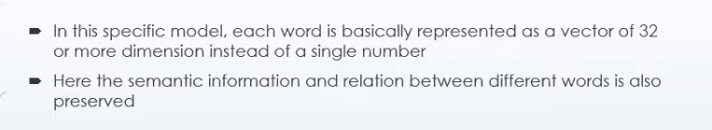

* Instead of giving words value of 1's, 0's or any other number we basically represent it as a vector of 32 or more dimentions instead of a single number. 
* in Word2Vec semantic info and relation between words is stored

For Example lets consider a vistual represenattion of word2vec words is represented in 2 dimension. X axis is dimesnion 1 and Y is dimension 2.  

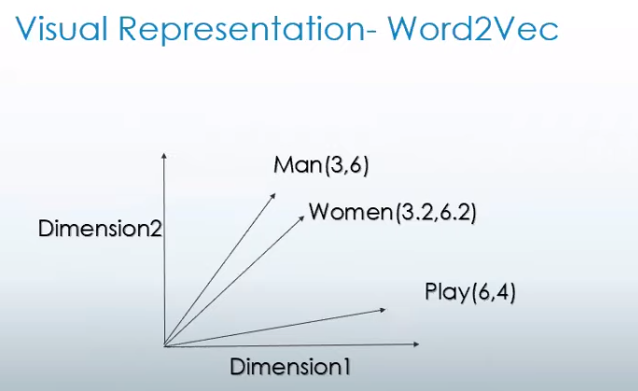

Because man and women has a relationship or they have a realted simanttics the distance between them is less. However, the word play is far away from these 2 words as shown in above visual represenation.

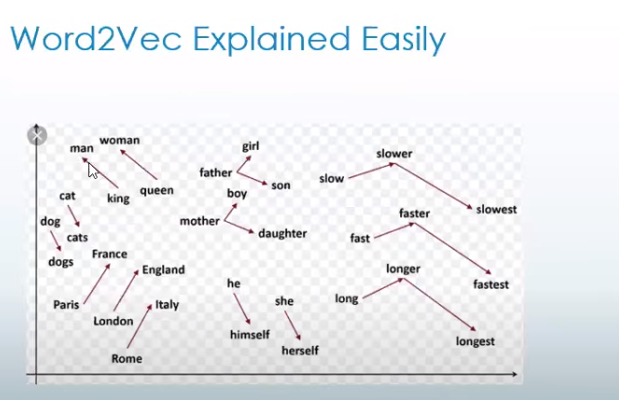

In the above pictures more words are represented in 2d and we notice more similar, common and interelated words are present near to each other and remaining words are far away from each other

**Example** google and many more companies are doing research in word2vec. A provded example is that since KIng and Queen are related we could perform a mathematical equation of words as showm below.

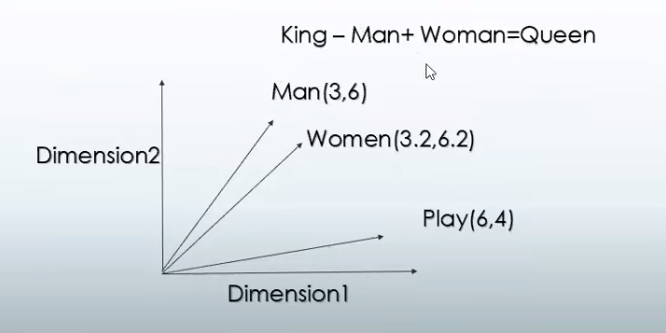

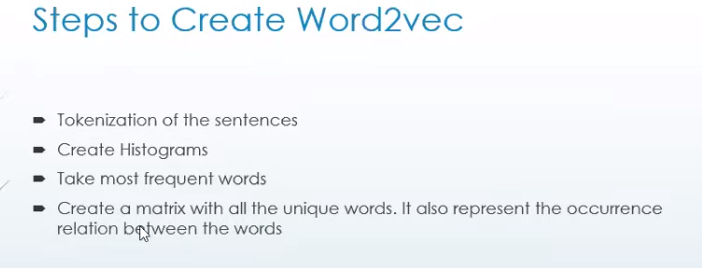

### Exercise word2vec (gensim.models.word2vec)

In [1]:
# import also packages here

import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords

import re



In [2]:
# Speech by APJ Abdul Kalam

paragraph = """I have three visions for India. In 3000 years of our history, people from all over 
               the world have come and invaded us, captured our lands, conquered our minds. 
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours. 
               Yet we have not done this to any other nation. We have not conquered anyone. 
               We have not grabbed their land, their culture, 
               their history and tried to enforce our way of life on them. 
               Why? Because we respect the freedom of others.That is why my 
               first vision is that of freedom. I believe that India got its first vision of 
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India 
               stands up to the world, no one will respect us. Only strength respects strength. We must be 
               strong not only as a military power but also as an economic power. Both must go hand-in-hand. 
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of 
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life. 
               I see four milestones in my career"""

In [3]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text) #The \s (lowercase s) matches a whitespace (blank, tab \t, and newline \r or \n)
text = text.lower()
text = re.sub(r'\d',' ',text) # will replace space inplace of numbers 
text = re.sub(r'\s+',' ',text) #The \s (lowercase s) matches a whitespace (blank, tab \t, and newline \r or \n)


In [4]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]


In [5]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)


words = model.wv.vocab

# Finding Word Vectors
vector = model.wv['war']

# Most similar words
#similar = model.wv.most_similar('war')
similar = model.wv.most_similar('freedom')

In [6]:
similar

[('dutch', 0.2642867863178253),
 ('developing', 0.22243493795394897),
 ('nurture', 0.21818974614143372),
 ('closely', 0.19356542825698853),
 ('unless', 0.17704825103282928),
 ('vikram', 0.1668989360332489),
 ('done', 0.16464829444885254),
 ('self-reliant', 0.16202792525291443),
 ('took', 0.15993452072143555),
 ('among', 0.15005700290203094)]